In [29]:
import numpy
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from mnist import *
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import lightgbm as lgb

In [2]:
X_train, y_train, X_test, y_test = ready_data("../data/MNIST/")

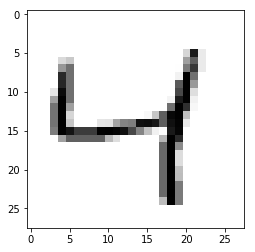

In [3]:
plt.imshow(X_train[2,:].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

In [24]:
%%time
model = SVC(kernel='poly')
model.fit(X_train[:1000,:], y_train[:1000])
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 915   11    5    1    2   26    9    6    2    3]
 [   0 1101    1    3    0    1    4    2   22    1]
 [  17   31  909    4   10    5   11   26   17    2]
 [   1   26   20  833    1   67    3   19   32    8]
 [   1   18    4    0  869    2   14    2    1   71]
 [   4   30    5   32    9  778   11    8    5   10]
 [  13   22   12    0   12   25  871    1    2    0]
 [   1   33   16   10   14    1    0  923    0   30]
 [  33   10   10   36   10   26    9   19  777   44]
 [  11   14    4   13   46    6    0   24    2  889]]
0.8865
Wall time: 6.86 s


In [34]:
%%time
model = GradientBoostingClassifier(n_estimators=1000)
model.fit(X_train[:1000,:], y_train[:1000])
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x0000013850494A58>>
Traceback (most recent call last):
  File "C:\Users\ztypl\Anaconda3\lib\site-packages\xgboost\core.py", line 892, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


[[ 944    1    6    2    3    4    4    4    8    4]
 [   0 1090    5    2    0    4    3    1   30    0]
 [  20   11  885   18   14    1   19   23   34    7]
 [  11    6   21  788    2   95    9   24   33   21]
 [   3   12   10    6  804    8   17    9   18   95]
 [  16    7    8   22   22  720   23   16   23   35]
 [  18    4   29    0   50   43  802    2    9    1]
 [   4   15   20   10   15    4    0  902    2   56]
 [   8   14   50   23   12   24   10   14  761   58]
 [  11    2    6   20   40   15    2   59    3  851]]
0.8547
Wall time: 48.9 s


In [35]:
%%time
model = lgb.LGBMClassifier()
model.fit(X_train[:1000,:], y_train[:1000])
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 942    1    5    0    2    7    9    3   11    0]
 [   0 1086   10    3    0    1    5    1   28    1]
 [  11    6  913   18   11    3   28   19   20    3]
 [   9    2   35  784    2   92    6   26   48    6]
 [   2    1    1    2  818    2   22   11    8  115]
 [  15   12    1   14    7  771   22   12   31    7]
 [  15    4   11    1   42   20  838    7   19    1]
 [   6    9   36    4   17    4    0  909    2   41]
 [   9   11   31    9   20   19   28   14  786   47]
 [   9    4    6   17   51   14    4   50    8  846]]
0.8693
Wall time: 6.53 s


C:\Users\ztypl\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [64]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28**2,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.categorical_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_46 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_47 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                210       
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=10), epochs=20)

Epoch 1/20
60000/60000 [==============================] - 9s 157us/step - loss: 4.1998 - categorical_accuracy: 0.6896
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.4253 - categorical_accuracy: 0.9098
Epoch 3/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.2528 - categorical_accuracy: 0.9400
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1842 - categorical_accuracy: 0.9536
Epoch 5/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.1477 - categorical_accuracy: 0.9612
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.1278 - categorical_accuracy: 0.9650
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1101 - categorical_accuracy: 0.9706
Epoch 8/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0960 - categorical_accuracy: 0.9733
Epoch 9/20
60000/60000 [==============================] 

In [66]:
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
y_pred = model.predict_classes(X_train)
print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[ 962    1   10    2    0    0    4    0    1    0]
 [   0 1119    4    2    0    1    2    1    6    0]
 [   1    1 1019    4    1    0    2    3    1    0]
 [   0    0    6  991    0    5    0    3    4    1]
 [   0    0    5    0  948    0    8    1    4   16]
 [   1    0    1   19    0  865    2    1    2    1]
 [   4    2    2    1    2   10  936    0    1    0]
 [   2    0    8    7    0    1    0 1003    0    7]
 [   0    1    6   12    0    7    3    5  939    1]
 [   2    3    1    9    7    5    0    8    8  966]]
0.9748
[[5860    1   41    1    1    3    7    1    8    0]
 [   0 6700   15    2    3    0    3   10    9    0]
 [   1    0 5933    8    2    0    0    4   10    0]
 [   0    1   14 6093    0    4    0    1   14    4]
 [   1    0    9    0 5762    0   23    2   20   25]
 [   1    0    1   32    1 5367    6    0   12    1]
 [   1    0   11    0    0   25 5874    0    7    0]
 [   1    2   40   11    0    0    0 6196    3   12]
 [   2    4   37   21    0   10    4  